# Predictions on different data quality

## Parameters and model

In [1]:
import sys
sys.path.append('..')

from util.graphs import plot_series
from timeseries.timeseries import StockMarketSeries
from timeseries.enums import SeriesColumn, DeviationSource
from predictions.model import PredictionModel

company_name = "Facebook"
time_series_start = "2017-01-03"
time_series_values = 300
columns = [SeriesColumn.CLOSE]
stock = StockMarketSeries(company_name, time_series_start, time_series_values,
                           weights={SeriesColumn.OPEN: 0.2,
                                    SeriesColumn.CLOSE: 0.2,
                                    SeriesColumn.ADJ_CLOSE: 0.25,
                                    SeriesColumn.HIGH: 0.15,
                                    SeriesColumn.LOW: 0.15,
                                    SeriesColumn.VOLUME: 0.05})

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsforecast\core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Data - one price column

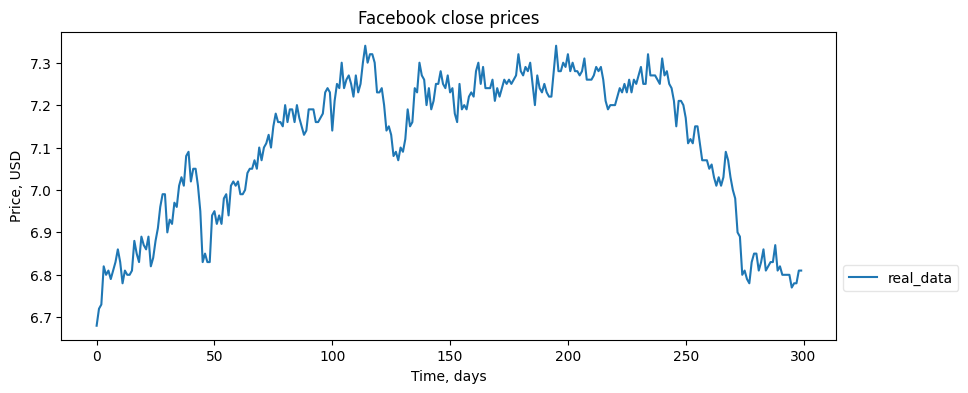

In [2]:
plot_series(stock, -1, "close prices", real_data=stock.real_series[SeriesColumn.CLOSE])

## Predictions parameters

In [3]:
prediction_start = 280
iterations = 5
graph_start = 0

model = PredictionModel(stock, prediction_start, columns, graph_start, iterations=iterations)

## Statistical methods

In [4]:
from predictions.normal.stats import AutoArima
from predictions.normal.stats import Ces

## ARIMA(p,d,q)

In [5]:
arima = model.configure_model(AutoArima)

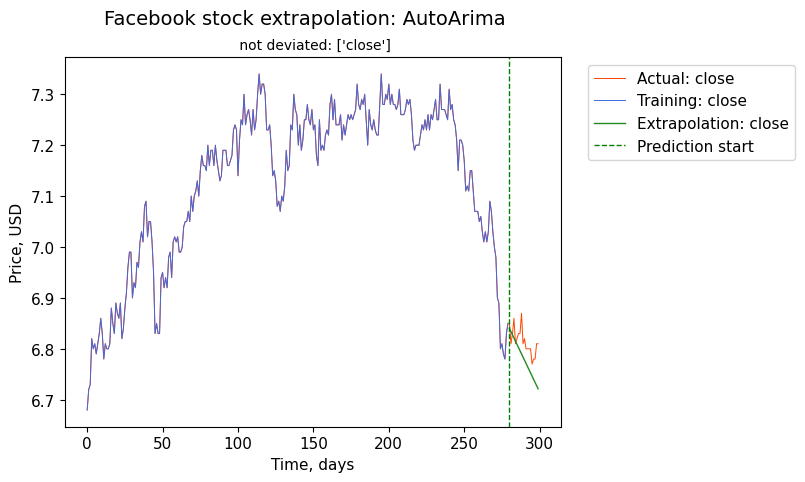

In [6]:
%%capture --no-stdout --no-display
arima.plot_prediction(source=DeviationSource.NONE)

In [7]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

Statistics [Facebook stock, close prices, 5 iterations]

    Num. Dev. Scale Improve             Time [ms]  Time SD  M. time  RMSE   MAE  MAPE  (p,q)
0      1    -     -       N  1.78 + 103.60 + 0.68     2.57     0.00  0.04  0.04  0.54  (1,1)
1      2    N     S       N   1.64 + 99.15 + 0.64     1.78     0.00  0.05  0.04  0.59  (1,1)
2      3    N     S       Y  1.65 + 216.27 + 0.66     2.18    26.75  0.06  0.05  0.70  (1,4)
3      4    N     M       N  1.66 + 107.08 + 0.67     2.26     0.00  0.04  0.03  0.50  (1,1)
4      5    N     M       Y  1.74 + 232.95 + 0.70     2.73    26.42  0.06  0.05  0.77  (1,4)
5      6    N     H       N   1.66 + 65.12 + 0.63     2.01     0.00  0.03  0.03  0.38  (0,1)
6      7    N     H       Y  1.77 + 130.74 + 0.67     1.15    27.73  0.07  0.06  0.90  (1,2)
7      8    I     S       N   1.65 + 91.74 + 0.65     2.10     0.00  0.04  0.03  0.49  (1,1)
8      9    I     S       Y  1.74 + 106.66 + 0.69     1.30     0.35  0.04  0.03  0.43  (1,1)
9     10    I

## CES

In [8]:
ces = model.configure_model(Ces)

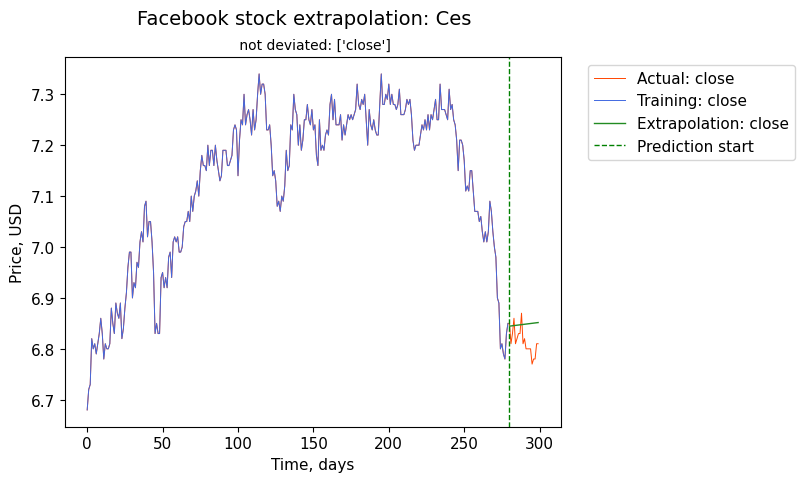

In [9]:
%%capture --no-stdout --no-display
ces.plot_prediction(source=DeviationSource.NONE)

In [10]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

Statistics [Facebook stock, close prices, 5 iterations]

    Num. Dev. Scale Improve           Time [ms]  Time SD  M. time  RMSE   MAE  MAPE
0      1    -     -       N  1.61 + 5.82 + 0.56     0.18     0.00  0.04  0.04  0.56
1      2    N     S       N  1.57 + 6.65 + 0.55     0.30     0.00  0.04  0.04  0.58
2      3    N     S       Y  1.52 + 8.53 + 0.51     0.14    26.75  0.03  0.03  0.44
3      4    N     M       N  1.48 + 5.90 + 0.52     0.05     0.00  0.05  0.04  0.65
4      5    N     M       Y  1.53 + 8.19 + 0.52     0.11    26.42  0.03  0.03  0.41
5      6    N     H       N  1.67 + 6.86 + 0.62     0.24     0.00  0.03  0.03  0.43
6      7    N     H       Y  1.64 + 6.34 + 0.56     0.08    27.73  0.03  0.02  0.32
7      8    I     S       N  1.66 + 5.84 + 0.60     0.14     0.00  0.04  0.04  0.56
8      9    I     S       Y  1.55 + 5.87 + 0.54     0.18     0.35  0.04  0.04  0.56
9     10    I     M       N  1.43 + 5.18 + 0.51     0.14     0.00  0.03  0.02  0.35
10    11    I     M

## XGBoost

In [11]:
from predictions.normal.ml import XGBoost

xgboost = model.configure_model(XGBoost, optimize=False)

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\Maciek\Desktop\Magisterka\project\run\..\predictions\graphs.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs.plot(series.values[graph_start:], "r", label=f"Actual: {column.value}", linewidth='0.7',
C:\Users\Maciek\Desktop\Magisterka\project\run\..\predictions\graphs.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs.plot(series[graph_start:], "b", label=f"Training: {column.value}", linewidth='0.7',


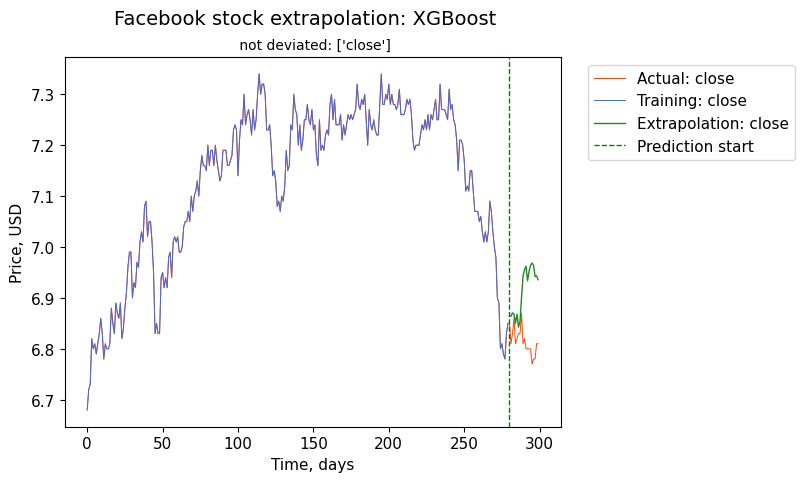

In [12]:
xgboost.plot_prediction(source=DeviationSource.NONE)

In [13]:
%%capture --no-stdout --no-display
xgboost.compute_statistics_set()

Statistics [Facebook stock, close prices, 5 iterations]

    Num. Dev. Scale Improve              Time [ms]  Time SD  M. time  RMSE   MAE  MAPE
0      1    -     -       N  2.73 + 43.92 + 111.90    11.50     0.00  0.12  0.10  1.44
1      2    N     S       N  2.69 + 41.18 + 102.73    15.49     0.00  0.13  0.11  1.59
2      3    N     S       Y  2.79 + 35.53 + 109.97     8.72    26.75  0.04  0.04  0.54
3      4    N     M       N   2.64 + 33.97 + 99.21    10.99     0.00  0.13  0.12  1.69
4      5    N     M       Y  2.86 + 30.17 + 101.19     9.60    26.42  0.05  0.05  0.67
5      6    N     H       N  2.99 + 49.84 + 119.59    17.60     0.00  0.11  0.09  1.25
6      7    N     H       Y  3.03 + 37.50 + 118.96    20.12    27.73  0.04  0.03  0.48
7      8    I     S       N  3.03 + 45.81 + 121.92    17.81     0.00  0.05  0.05  0.69
8      9    I     S       Y  2.97 + 48.59 + 119.92     9.27     0.35  0.06  0.05  0.74
9     10    I     M       N  2.89 + 37.25 + 108.17    14.31     0.00  0.0

## Reservoir computing

In [14]:
from predictions.normal.nn import Reservoir

reservoir = model.configure_model(Reservoir)

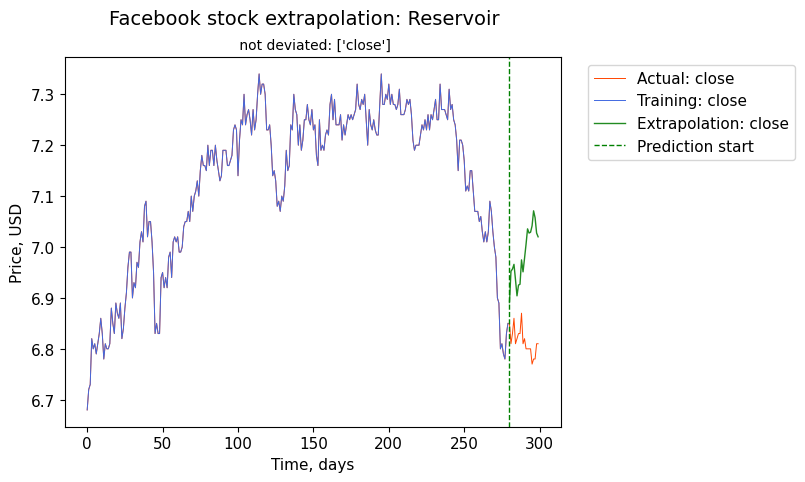

In [15]:
reservoir.plot_prediction(source=DeviationSource.NONE)

In [16]:
%%capture --no-stdout --no-display
reservoir.compute_statistics_set()

Statistics [Facebook stock, close prices, 5 iterations]

    Num. Dev. Scale Improve             Time [ms]  Time SD  M. time  RMSE   MAE  MAPE
0      1    -     -       N  0.29 + 183.77 + 1.40     1.39     0.00  0.18  0.17  2.49
1      2    N     S       N  0.30 + 184.22 + 1.40     1.83     0.00  0.18  0.16  2.37
2      3    N     S       Y  0.31 + 187.58 + 1.45     1.45    26.75  0.08  0.07  1.01
3      4    N     M       N  0.30 + 186.15 + 1.44     1.38     0.00  0.19  0.18  2.69
4      5    N     M       Y  0.31 + 185.40 + 1.46     2.79    26.42  0.09  0.08  1.20
5      6    N     H       N  0.30 + 186.85 + 1.51     2.76     0.00  0.15  0.13  1.97
6      7    N     H       Y  0.30 + 184.56 + 1.45     1.64    27.73  0.02  0.02  0.26
7      8    I     S       N  0.29 + 192.21 + 1.50     0.88     0.00  0.22  0.20  2.99
8      9    I     S       Y  0.30 + 185.51 + 1.40     1.48     0.35  0.10  0.09  1.39
9     10    I     M       N  0.31 + 185.95 + 1.49     1.57     0.00  0.19  0.17  2.